In [1233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [1234]:
corpus = "clef" 
judges = "factors_"
v2 = True
k = 100
# njudges = int(judges[0])

In [1235]:
scores = pd.read_csv(f"controversy_results/controversy_scores_{judges}{corpus}.csv")

if v2:
    scores.loc[:, "topic"] = scores["topic"].astype("str")
    scores = scores[(scores["topic"].str.endswith("4")) | (scores["topic"].str.endswith("5")) | (scores["topic"].str.endswith("6"))]
    scores.reset_index(drop=True, inplace=True)
    corpus = "clef_v2"

scores

,topic,score1,score2,score3,score4,score5
0,101004,"[2, 3, 3, 3, 3]","[2, 3, 2, 3, 3]","[1, 2, 2, 2, 2]","[2, 3, 3, 3, 3]","[2, 3, 2, 2, 3]"
1,101005,"[2, 3, 3, 3, 3]","[1, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[1, 3, 2, 3, 3]"
2,101006,"[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 2, 3]"
3,102004,"[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 2, 3]","[2, 3, 2, 3, 3]"
4,102005,"[1, 2, 2, 2, 2]","[2, 2, 2, 2, 2]","[2, 2, 2, 2, 2]","[1, 2, 2, 2, 2]","[1, 2, 2, 1, 2]"
...,...,...,...,...,...,...
145,149005,"[2, 3, 3, 2, 3]","[2, 3, 3, 3, 3]","[2, 2, 3, 2, 3]","[2, 2, 3, 2, 3]","[1, 3, 2, 2, 2]"
146,149006,"[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[2, 4, 3, 4, 3]","[2, 3, 3, 3, 3]"
147,150004,"[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 4, 4, 4]","[3, 4, 3, 4, 4]","[2, 3, 4, 3, 3]"
148,150005,"[2, 3, 3, 3, 3]","[2, 3, 3, 3, 3]","[1, 2, 2, 2, 2]","[2, 2, 2, 2, 2]","[1, 2, 1, 2, 2]"


In [1236]:
for col in scores.columns:
        if col != 'topic':
            scores[col] = scores[col].apply(lambda x: ast.literal_eval(x)[-4])

scores

,topic,score1,score2,score3,score4,score5
0,101004,3,3,2,3,3
1,101005,3,3,3,3,3
2,101006,3,3,3,3,3
3,102004,3,3,3,3,3
4,102005,2,2,2,2,2
...,...,...,...,...,...,...
145,149005,3,3,2,2,3
146,149006,3,3,3,4,3
147,150004,4,4,4,4,3
148,150005,3,3,2,2,2


In [1237]:
scores.describe()

,score1,score2,score3,score4,score5
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.006667,3.013333,2.946667,3.000000,2.993333
std,0.855277,0.889813,0.880716,0.926855,0.893651
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [1238]:
# Compute the standard deviation for each row (excluding 'topic' column)
row_std = scores.iloc[:, 1:].std(axis=1)

# Compute the average of these standard deviations
row_std.mean()

0.2511338886414726

In [1239]:
if judges != "":
    scores["score"] = scores[["score1", "score2", "score3", "score4", "score5"]].sum(axis=1)
    scores["score0-5"] = scores["score"] / 5

In [1240]:
df = scores.sort_values(by="score", ascending=False)
df = df.reset_index(drop=True)
df

,topic,score1,score2,score3,score4,score5,score,score0-5
0,112006,4,5,5,5,5,24,4.8
1,107006,5,5,4,4,4,22,4.4
2,118006,4,4,4,5,4,21,4.2
3,135006,4,4,4,4,4,20,4.0
4,115005,4,4,4,4,4,20,4.0
...,...,...,...,...,...,...,...,...
145,122006,2,1,1,1,1,6,1.2
146,146004,1,1,1,1,1,5,1.0
147,114006,1,1,1,1,1,5,1.0
148,131005,1,1,1,1,1,5,1.0


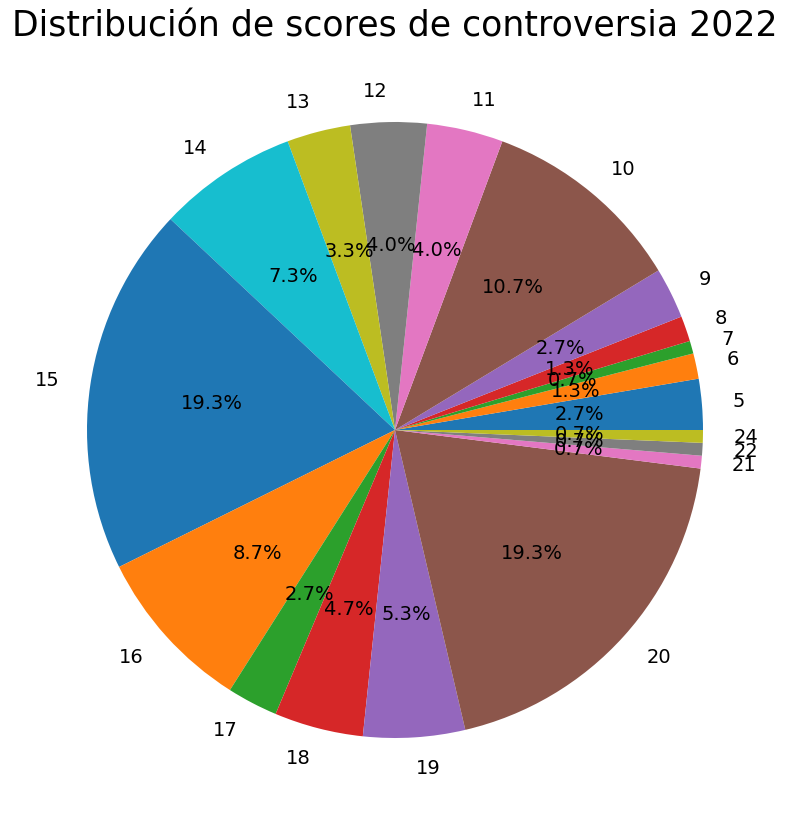

In [1241]:
# Group by score and count the number of topics in each score group
df_grouped = df.groupby('score').count()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={"topic": "count"})

# Do a pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_grouped['count'], labels=df_grouped['score'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribución de scores de controversia 2022', fontsize=25)
plt.show()

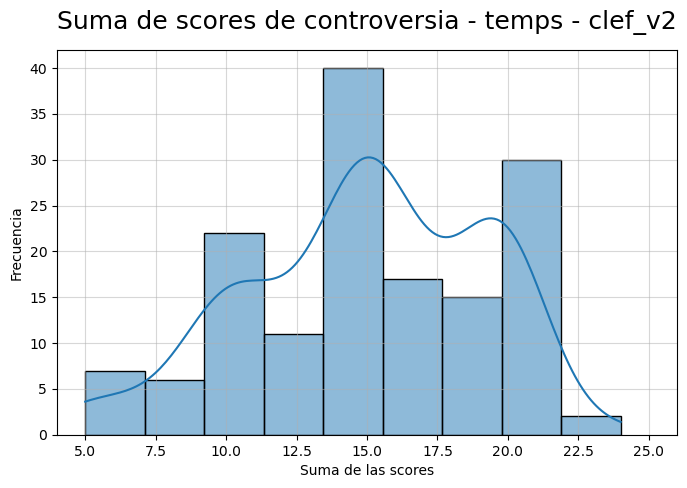

In [1242]:
plt.figure(figsize=(8, 5))
sns.histplot(df['score'], kde=True)
plt.xlabel(f"Suma de las scores")
plt.xlim(4, 26)
plt.ylabel("Frecuencia")
plt.title(f"Suma de scores de controversia - temps - {corpus}", fontsize=18, pad=15)
plt.grid(True, alpha=0.5)

plt.show()

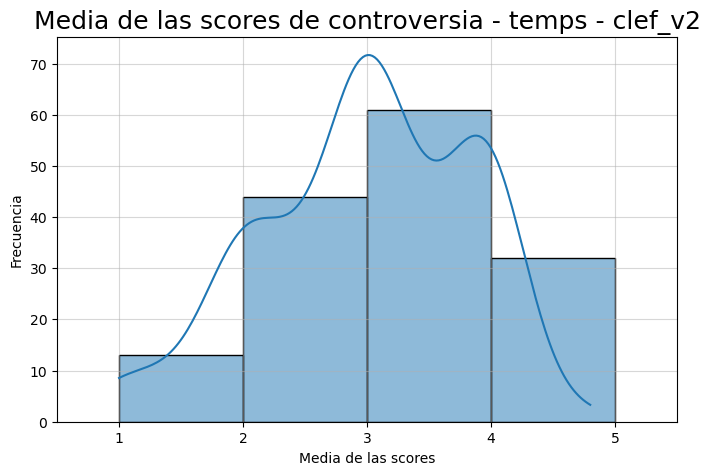

In [1243]:
plt.figure(figsize=(8, 5))
bin_edges = [1, 2, 3, 4, 5]
sns.histplot(df['score0-5'], kde=True, bins=bin_edges)
plt.xlabel(f"Media de las scores")
plt.ylabel("Frecuencia")
plt.xlim(0.5, 5.5)
plt.title(f"Media de las scores de controversia - temps - {corpus}", fontsize=18)
plt.grid(True, alpha=0.5)

plt.show()

In [1244]:
harmful_at_k_2020 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2020_bm25.csv')
harmful_at_k_2021 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2021_bm25.csv')
harmful_at_k_2022 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2022_bm25.csv')
harmful_at_k_clef = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_bm25.csv')
harmful_at_k_clef_v2 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_v2_bm25.csv')

# harmful_at_k_2020 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2020_minilm12.csv')
# harmful_at_k_2021 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2021_minilm12.csv')
# harmful_at_k_2022 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_2022_minilm12.csv')
# harmful_at_k_clef = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_minilm12.csv')
# harmful_at_k_clef_v2 = pd.read_csv(f'harmful_at_k/harmful_at_{str(k)}_clef_v2_minilm12.csv')


harmfuls_at_k = {"2020": harmful_at_k_2020, "2021": harmful_at_k_2021, "2022": harmful_at_k_2022, "clef": harmful_at_k_clef, "clef_v2": harmful_at_k_clef_v2}

In [1245]:
harmful_at_k_clef_v2

,topic,harmful_at_100
0,101004,0.01
1,101005,0.01
2,101006,0.01
3,102004,0.03
4,102005,0.02
...,...,...
145,149005,0.10
146,149006,0.03
147,150004,0.37
148,150005,0.35


In [1246]:
harmfuls_at_k[corpus][f"score0-5"] = df[f"score0-5"]
harmfuls_at_k[corpus]

,topic,harmful_at_100,score0-5
0,101004,0.01,4.8
1,101005,0.01,4.4
2,101006,0.01,4.2
3,102004,0.03,4.0
4,102005,0.02,4.0
...,...,...,...
145,149005,0.10,1.2
146,149006,0.03,1.0
147,150004,0.37,1.0
148,150005,0.35,1.0


In [1247]:
harmfuls_at_k[corpus].corr(method="pearson").round(3)
    

,topic,harmful_at_100,score0-5
topic,1.000,0.010,-0.972
harmful_at_100,0.010,1.000,-0.035
score0-5,-0.972,-0.035,1.000


In [1248]:
harmfuls_at_k[corpus].corr(method="kendall").round(3)

,topic,harmful_at_100,score0-5
topic,1.000,0.052,-0.946
harmful_at_100,0.052,1.000,-0.054
score0-5,-0.946,-0.054,1.000


In [1249]:
harmfuls_at_k[corpus].corr(method="spearman").round(3)

,topic,harmful_at_100,score0-5
topic,1.000,0.101,-0.991
harmful_at_100,0.101,1.000,-0.092
score0-5,-0.991,-0.092,1.000
